**Autor** : Renato de Moraes

**e-mail**: rntmoraes@gmail.com

#  <a name="resumo"> RESUMO </a>

Esse notebook tem como objetivo fazer a análise descritiva e tratamento dos dados de um dataset de clientes com maior probabilidade de default para entender o perfil dos clientes e quais fatores podem influenciar no risco de crédito.

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [Índice](#indice)
* [Seção 1 - Importando os Arquivos](#secao_1)
* [Seção 2 - Visualizando os Dados](#secao_2)
* [Seção 3 - Tratamento de Dados](#secao_3)
* [Seção 4 - Análise Exploratória e Tratamento de Dados Adicionais](#secao_4)
* [Conclusão](#conclusao)

#  <a name="secao_1"> Seção 1 - Importando as bibliotecas e arquivos</a>
[Voltar ao índice](#indice)

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_raw = pd.read_csv('risco_credito.csv')
df_raw.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


#### Criando uma cópia do df_raw

In [3]:
df = df_raw.copy()
# Corrigindo um erro de digitação do arquivo csv.
df.rename(columns={'n_emprestimos_inadiplentes':'n_emprestimos_inadimplentes'}, inplace=True)
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadimplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


#  <a name="secao_2"> Seção 2 - Visualizando os Dados</a>
[Voltar ao índice](#indice)

In [4]:
def show_info(data):
    print('DATASET SHAPE: {}'.format(data.shape))
    print('-'*50)
    print('FEATURE DATA TYPES:\n')
    display(data.info())
    print('-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:\n')
    display(data.nunique())
    print('-'*50)
    print('NULL VALUES PER FEATURE:\n')
    display(data.isnull().sum())
    print('-'*50)
    print('STATISTICAL INFORMATION:')
    display(df.describe().round(2).T)

In [5]:
show_info(df)

DATASET SHAPE: (64592, 10)
--------------------------------------------------
FEATURE DATA TYPES:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   default                      59966 non-null  object 
 1   t_risco                      63807 non-null  float64
 2   valor_emprestimo             63807 non-null  float64
 3   prazo_pagamento              63807 non-null  float64
 4   limite_credito               44839 non-null  float64
 5   renda                        63807 non-null  float64
 6   signo                        43825 non-null  object 
 7   genero                       57406 non-null  object 
 8   perfil_facebook              58185 non-null  object 
 9   n_emprestimos_inadimplentes  63789 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.9+ MB


None

--------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE:



default                            2
t_risco                           82
valor_emprestimo               53348
prazo_pagamento                    2
limite_credito                 28259
renda                          57430
signo                             12
genero                             2
perfil_facebook                    2
n_emprestimos_inadimplentes        5
dtype: int64

--------------------------------------------------
NULL VALUES PER FEATURE:



default                         4626
t_risco                          785
valor_emprestimo                 785
prazo_pagamento                  785
limite_credito                 19753
renda                            785
signo                          20767
genero                          7186
perfil_facebook                 6407
n_emprestimos_inadimplentes      803
dtype: int64

--------------------------------------------------
STATISTICAL INFORMATION:


,count,mean,std,min,25%,50%,75%,max
t_risco,63807.0,0.30,0.10,0.00,0.22,0.29,0.36,0.90
valor_emprestimo,63807.0,13853.28,8105.66,527.07,7762.94,12023.68,19384.82,35059.60
prazo_pagamento,63807.0,41.84,10.30,36.00,36.00,36.00,36.00,60.00
limite_credito,44839.0,34562.01,37041.87,0.00,10000.00,25775.00,47326.50,613117.00
renda,63807.0,71809.72,51249.93,4821.18,45013.36,61399.16,86026.45,5000027.83
n_emprestimos_inadimplentes,63789.0,0.00,0.08,0.00,0.00,0.00,0.00,5.00


#### Representação visual da quantidade de valores nulos, por coluna

<AxesSubplot:>

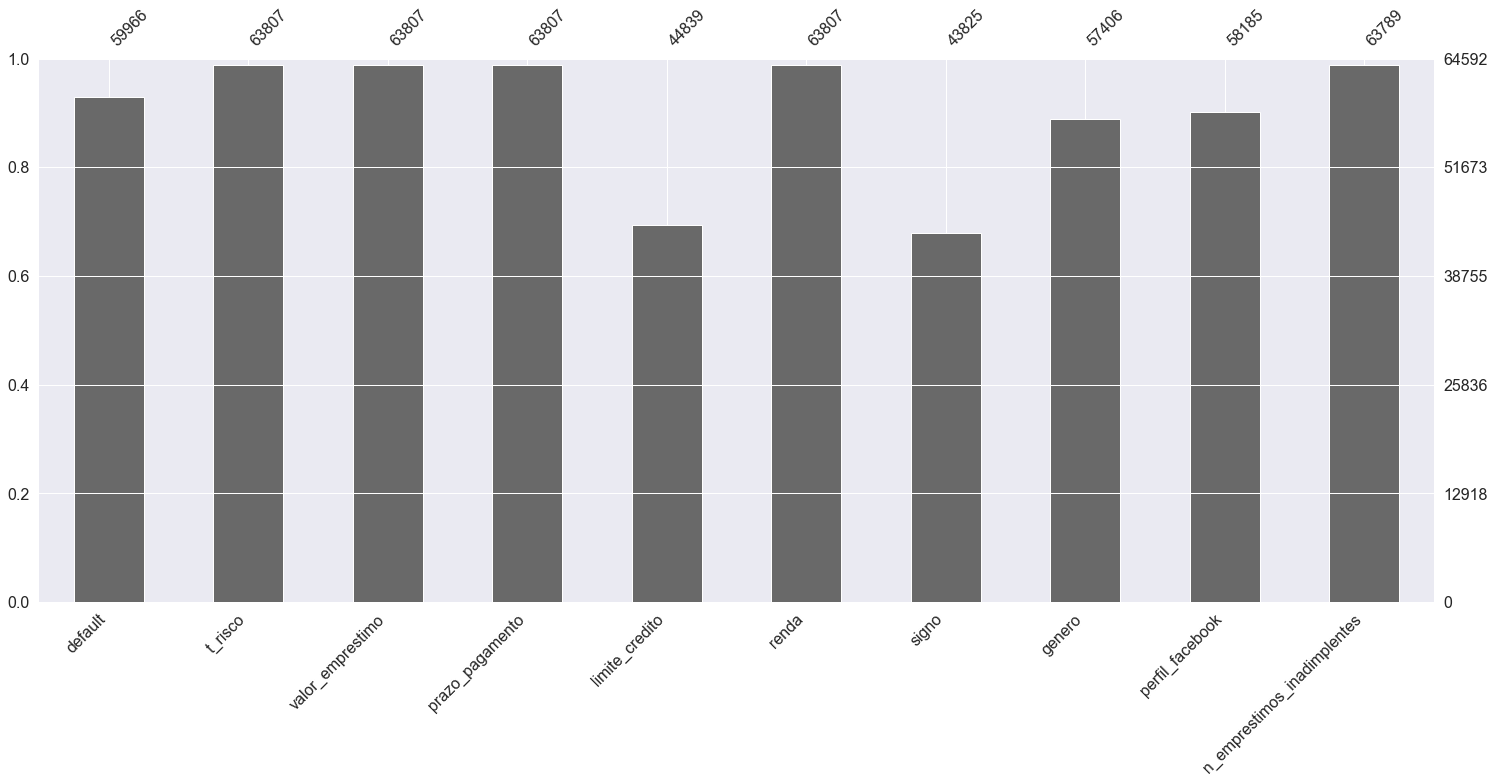

In [6]:
msno.bar(df)

#  <a name="secao_3"> Seção 3 - Tratamento de Dados</a>
[Voltar ao índice](#indice)

1) Exclusão das linhas nulas, referente à coluna 'default'. A quantidade de registros que serão excluídos representa aproximadamente 7% do total. 

In [7]:
df.dropna(subset=['default'], inplace=True)

In [8]:
df.shape

(59966, 10)

2) Excluindo a coluna 'signo'. As classes possuem contagem bem parecidas (não possuindo assim uma moda que se destaque) só se destacando a contagem dos valores nulos que representam aproximadamente 31% dos registros. Como aparentemente os valores dessa variável não apresentam correlação relevante com a variável resposta ('default'), considero que a melhor opção é excluir a coluna 'signos' ao invés das linhas nulas, para não perder 31% dos registros do Data Frame. 

In [9]:
df.signo.value_counts()

libr     5582
virg     5571
cance    5541
leo      3507
gemi     3499
scor     3091
arie     3045
pisce    2992
capr     2958
aqua     2839
sagi     1402
taur     1001
Name: signo, dtype: int64

In [10]:
df.signo.isnull().sum()

18938

In [11]:
(df.signo.isnull().sum()) / df.shape[0]

0.31581229363305874

In [12]:
df = df.drop(columns=['signo'])

3) Pelo resumo das variáveis quantitativas, o ideal é substituir os valores faltantes das colunas 'limite_credito' e n_emprestimos_inadimplentes pelas medianas.

In [13]:
valores_preenchimento = {'limite_credito': df['limite_credito'].median(),
                        'n_emprestimos_inadimplentes': df['n_emprestimos_inadimplentes'].median()}

In [14]:
df.fillna(value=valores_preenchimento,
          axis=0,
          inplace=True)

4) Substituindo os valores nulos das variáveis qualitativas pelas suas respectivas Modas

In [15]:
df.genero.value_counts()

m    38497
f    18473
Name: genero, dtype: int64

In [16]:
df.perfil_facebook.value_counts()

False    33997
True     19998
Name: perfil_facebook, dtype: int64

In [17]:
quali_preenchimento = {'genero': df.genero.mode()[0],
                      'perfil_facebook': df.perfil_facebook.mode()[0]}
df.fillna(value=quali_preenchimento, axis=0, inplace=True)

In [18]:
df.isnull().sum()

default                        0
t_risco                        0
valor_emprestimo               0
prazo_pagamento                0
limite_credito                 0
renda                          0
genero                         0
perfil_facebook                0
n_emprestimos_inadimplentes    0
dtype: int64

#  <a name="secao_4"> Seção 4 - Análise Exploratória e tratamento de dados adicionais</a>
[Voltar ao índice](#indice)

In [19]:
df.columns

Index(['default', 't_risco', 'valor_emprestimo', 'prazo_pagamento',
       'limite_credito', 'renda', 'genero', 'perfil_facebook',
       'n_emprestimos_inadimplentes'],
      dtype='object')

### Variáveis Qualitativas

*  A variável resposta ('default') possui classes desbalanceadas. 84% = False
*  A variável 'prazo_pagamento' possui apenas dois valores (36 e 60), por isso será transformada e tratada como uma variável dicotômica. 
*  80% optam pelo prazo de pagamento de 36 meses.
*  68% são homens.
*  66% não possuem perfil no facebook

In [20]:
df['genero'] = df['genero'].map({'m': 'Masculino', 'f': 'Feminino'})
df['prazo_pagamento'] = df['prazo_pagamento'].map({36.0: '36 meses', 60.0: '60 meses'})
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,perfil_facebook,n_emprestimos_inadimplentes
0,False,0.43,20024.31,60 meses,62386.0,59869.05,Feminino,True,0.0
1,False,0.23,10046.51,36 meses,25338.0,46016.31,Feminino,False,0.0
2,False,0.30,21228.25,60 meses,25338.0,48025.47,Masculino,True,0.0
3,False,0.15,23032.33,36 meses,25338.0,46011.12,Masculino,False,0.0
4,False,0.08,24026.29,36 meses,32366.0,90026.17,Masculino,False,0.0


In [21]:
df['default'].value_counts(normalize=True)

False    0.84141
True     0.15859
Name: default, dtype: float64

In [22]:
df['genero'].value_counts(normalize=True)

Masculino    0.691942
Feminino     0.308058
Name: genero, dtype: float64

In [23]:
df['perfil_facebook'].value_counts(normalize=True)

False    0.666511
True     0.333489
Name: perfil_facebook, dtype: float64

In [24]:
df['prazo_pagamento'].value_counts(normalize=True)

36 meses    0.805223
60 meses    0.194777
Name: prazo_pagamento, dtype: float64

Criando o **df_quali** somente com as variáveis qualitativas

In [25]:
valores_nominais = ['object', 'bool']
colunas_qualitativas = list(df.select_dtypes(valores_nominais))
df_quali = df[colunas_qualitativas]
df_quali.head(3)

,default,prazo_pagamento,genero,perfil_facebook
0,False,60 meses,Feminino,True
1,False,36 meses,Feminino,False
2,False,60 meses,Masculino,True


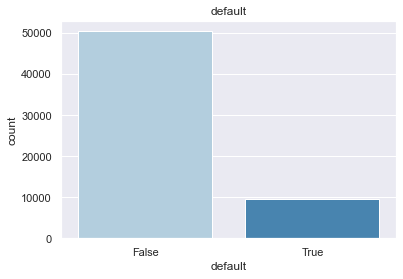

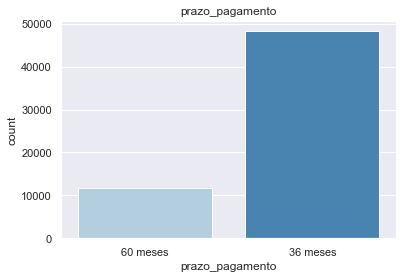

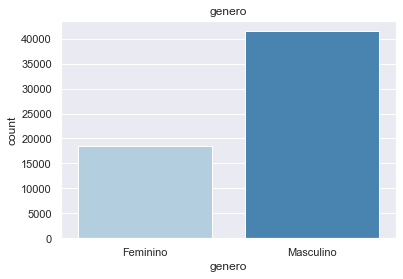

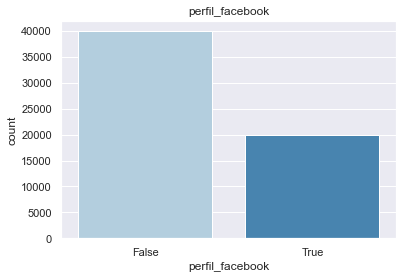

In [26]:
for col in df_quali:
    sns.countplot(x=df_quali[col], palette='Blues').set_title(col)
    plt.show()

### Variáveis Quantitativas

*  A taxa de risco teve um pico em torno de 0.3.
*  75% pediram empréstimo até o valor de 18036. O valor máximo é de: 35059
*  75% têm limite de crédito de até 35125
*  75% tem taxa de risco de até 0.36. O valor máximo é de: 0.90
*  99% não possuem empréstimos inadimplentes.

In [27]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
t_risco,59966.0,0.29,0.10,0.00,0.22,0.29,0.36,0.90
valor_emprestimo,59966.0,13411.81,7957.40,527.07,7225.99,12012.40,18036.64,35059.60
limite_credito,59966.0,31351.28,30753.70,0.00,17316.50,25338.00,35125.00,613117.00
renda,59966.0,71325.78,51691.43,4821.18,44027.86,60047.26,85039.61,5000027.83
n_emprestimos_inadimplentes,59966.0,0.00,0.08,0.00,0.00,0.00,0.00,5.00


In [28]:
numericals = ['t_risco', 'valor_emprestimo', 'limite_credito', 'renda', 'n_emprestimos_inadimplentes']

In [29]:
CV_t_risco = sts.stdev(df['t_risco'])/sts.mean(df['t_risco'])
CV_valor_emprestimo = sts.stdev(df['valor_emprestimo'])/sts.mean(df['valor_emprestimo'])
CV_limite_credito = sts.stdev(df['limite_credito'])/sts.mean(df['limite_credito'])
CV_renda = sts.stdev(df['renda'])/sts.mean(df['renda'])

print('CV_t_risco: {:.2%}'.format(CV_t_risco))
print('CV_valor_emprestimo: {:.2%}'.format(CV_valor_emprestimo))
print('CV_limite_credito: {:.2%}'.format(CV_limite_credito))
print('CV_renda: {:.2%}'.format(CV_renda))

CV_t_risco: 34.40%
CV_valor_emprestimo: 59.33%
CV_limite_credito: 98.09%
CV_renda: 72.47%


In [30]:
df['n_emprestimos_inadimplentes'].value_counts(normalize=True)

0.0    0.995964
1.0    0.003519
2.0    0.000434
3.0    0.000067
5.0    0.000017
Name: n_emprestimos_inadimplentes, dtype: float64

Criando o **df_quanti** somente com as variáveis quantitativas

In [31]:
df_quanti = df[numericals]
display(df_quanti.head(3))
df.describe().T

,t_risco,valor_emprestimo,limite_credito,renda,n_emprestimos_inadimplentes
0,0.43,20024.31,62386.0,59869.05,0.0
1,0.23,10046.51,25338.0,46016.31,0.0
2,0.30,21228.25,25338.0,48025.47,0.0


,count,mean,std,min,25%,50%,75%,max
t_risco,59966.0,0.294114,0.101183,0.00,0.2200,0.29,0.3600,0.90
valor_emprestimo,59966.0,13411.805468,7957.402823,527.07,7225.9875,12012.40,18036.6450,35059.60
limite_credito,59966.0,31351.281393,30753.702302,0.00,17316.5000,25338.00,35125.0000,613117.00
renda,59966.0,71325.776783,51691.429992,4821.18,44027.8575,60047.26,85039.6125,5000027.83
n_emprestimos_inadimplentes,59966.0,0.004669,0.079048,0.00,0.0000,0.00,0.0000,5.00


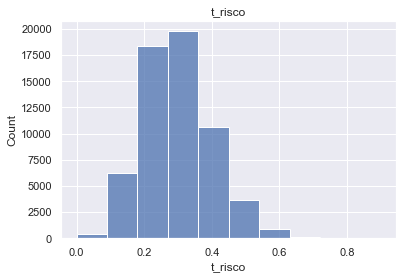

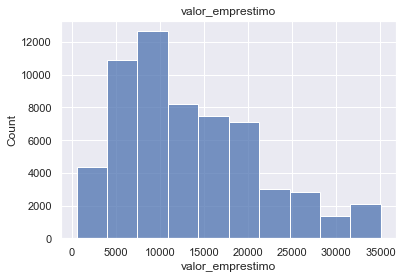

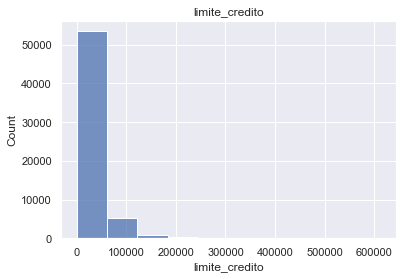

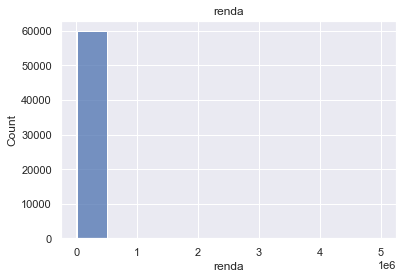

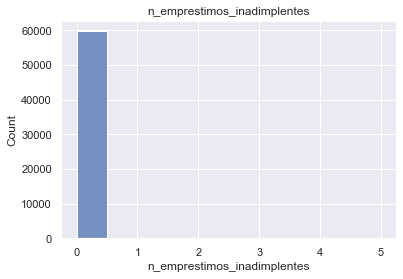

In [32]:
for col in df_quanti:
    sns.histplot(df_quanti[col], bins=10, palette='Blues').set_title(col)
    plt.show()

### Análise Bivariada

*  Visualizando os gráficos das variáveis 'genero', 'perfil_facebook' e 'prazo_pagamento' estratficados pela variável resposta ('default') não parece haver uma diferença significativa, porém as pequenas variações podem ser verificadas em testes de hipóteses. 

<AxesSubplot:xlabel='prazo_pagamento', ylabel='count'>

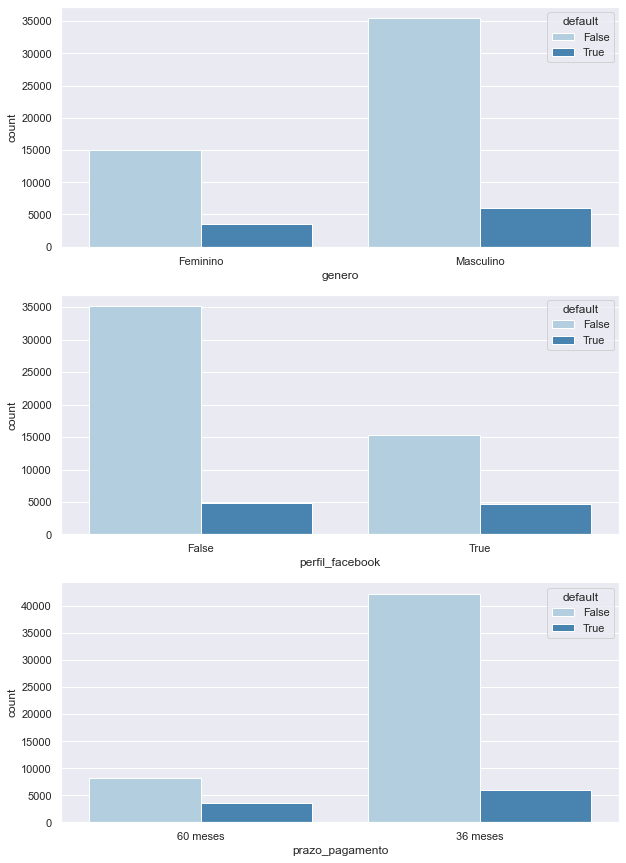

In [33]:
fig, ax = plt.subplots(3, 1, figsize=(10,15))
#plt.tight_layout(pad=1)

sns.countplot(x=df.genero, hue=df.default, ax=ax[0], palette='Blues')
sns.countplot(x=df.perfil_facebook, hue=df.default, ax=ax[1], palette='Blues')
sns.countplot(x=df.prazo_pagamento, hue=df.default, ax=ax[2], palette='Blues')

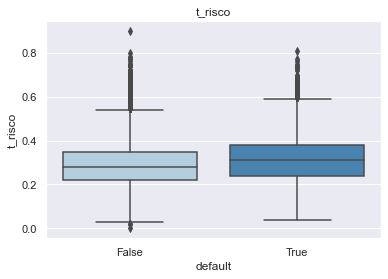

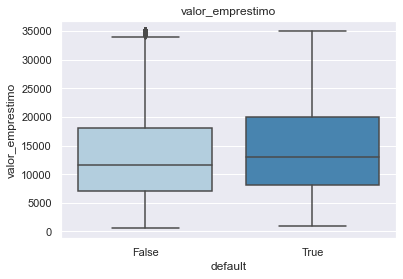

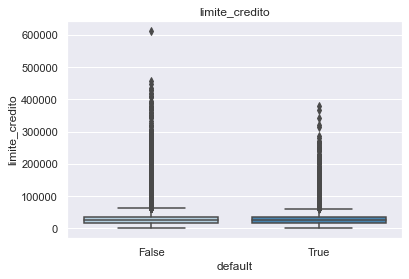

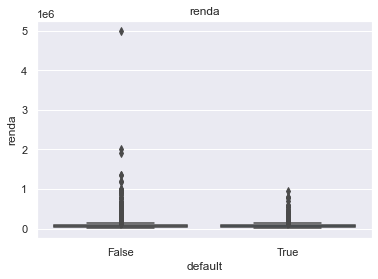

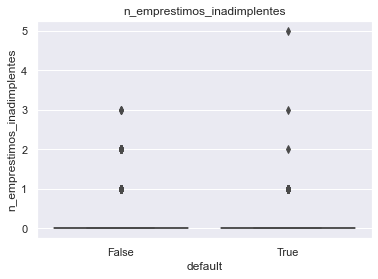

In [34]:
for col in df_quanti:
    sns.boxplot(y=df_quanti[col], x='default', data=df, palette='Blues').set_title(col)
    plt.show()

### Correlação entre as variáveis quantitativas

<AxesSubplot:>

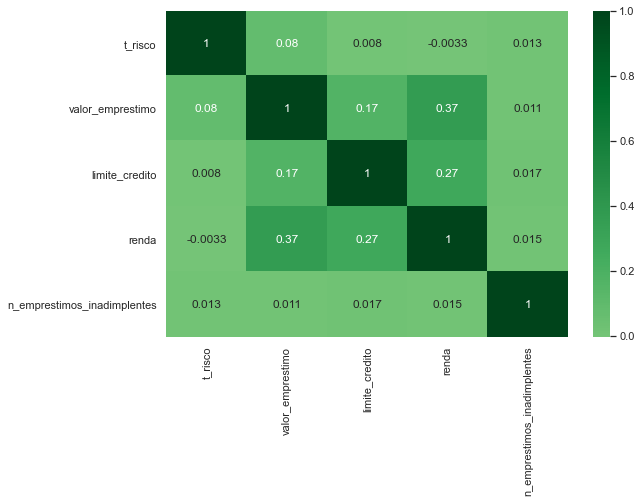

In [35]:
plt.figure(figsize=(9,6))
sns.heatmap(df_quanti.corr(), cmap= 'Greens', center=0, annot=True)

### Gráficos de Dispersão - estratificados pela varíável resposta ('default')

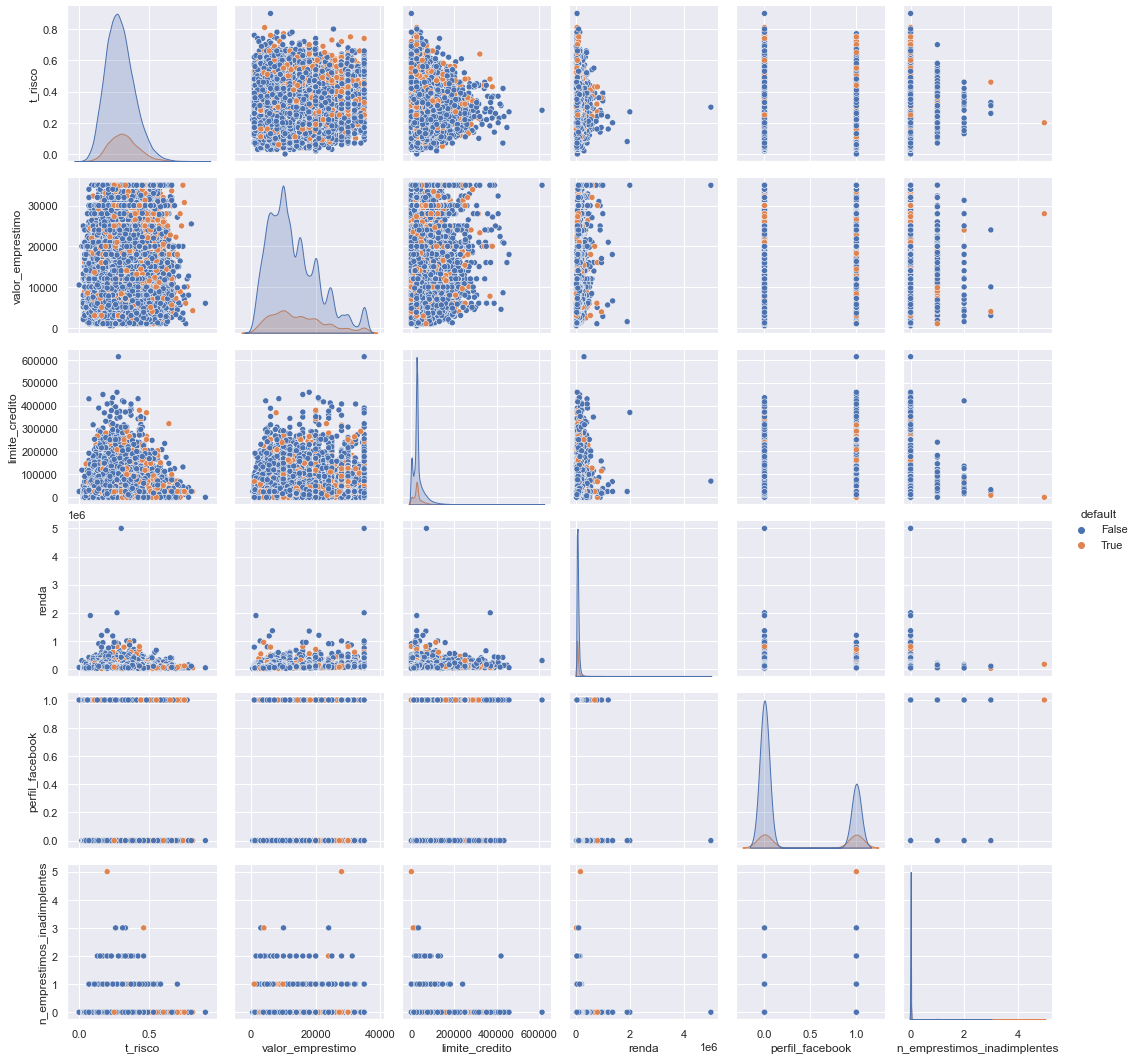

In [36]:
sns.pairplot(data=df, hue='default')

#  <a name="conclusao"> Conclusão</a>
[Voltar ao índice](#indice)

Analisando o quadro de correlação entre as variáveis quantitativas não encontramos nenhuma variável que apresente forte correlação com as demais e os gráficos de dispersão não demonstram aparente relação linear entre as variáveis. Devido a esse comportamento aleatório das variáveis, não foi possível identificar padrões na variável resposta.
Durante a análise bivariada, percebemos uma pequena variação indicando que o aumento da taxa de risco (t_risco) e do valor do empréstimo (valor_emprestimo) podem aumentar as chances de não pagamento (default=True), porém para que possamos confirmar essa tendência, devemos realizar testes de hipóteses.